 # Capstone Case Study

## 1. Assimilate the business scenario and articulate testable hypotheses.

The business scenario is mainly to understand the impact of moving from standard tiered subscription model to more customised model for different countries. The data science problem here is regression problem (supervised learning) to understand the impact of moving to new model in terms of monthly revenue. The following hypotheses can be made for the above business scenario

a. Null Hypothesis - There is no change in the revenue from the existing and new model for all the countries compared to previous month

b. Hypothesis 1 - The revenue for top 10 countries by usage are not impacted but other countries will see decreased revenues compared to previous month

c. Hypothesis 2 - The revenue for all the countries will increase as conversions will improve due to customized subscription model compared to previous month

d. Hypothesis 3 - The revenue for all the countries will decrease as customized subscription model will reduce revenue per user compared to previous month

## 2. Create a python script to extract relevant data from multiple data sources, automating the process of data ingestion.

In [33]:
import os
import sys
import pandas as pd
import numpy as np
from solution.cslib import *

In [36]:
cs_train_dir = os.path.join(".","cs-train")
df = fetch_data(cs_train_dir)
df.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,13085.0,28,489434,11,6.95,85048,12,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


## 3. Investigate the relationship between the relevant data, the target and the business metric.

In [42]:
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

# Top 10 Countries by Revenue
countries = df['country'].values

top10 = pd.crosstab(df['country'], df['year'], values=df['price'], aggfunc='sum', margins=True, margins_name='total')
top10 = top10.sort_values('total', ascending=False)
print(top10.head(11))

year                 2017         2018         2019        total
country                                                         
total           198307.76  2526012.744  1189876.862  3914197.366
United Kingdom  187241.07  2272135.643  1062136.792  3521513.505
EIRE              4433.09    74398.300    28237.820   107069.210
Germany           1525.79    30554.331    17191.700    49271.821
France            1200.34    24538.340    14826.460    40565.140
Norway             123.28    34716.400     3655.070    38494.750
Spain              845.22     7311.560     7884.210    16040.990
Hong Kong             NaN     8715.380     5737.190    14452.570
Portugal           294.35     4292.260     8942.060    13528.670
Singapore             NaN      372.510    12803.410    13175.920
Netherlands        384.26     8948.110     2990.430    12322.800


In [43]:
# Month Wise Revenue Distribution
df['month'] = df['invoice_date'].map(lambda x: x.month)
rev = pd.crosstab(df['country'], [df['year'], df['month']], values=df['price'], aggfunc='sum', margins=True, margins_name='total')
rev = rev.sort_values('total', ascending=False)
rev = rev.head(11)
rev = rev.transpose()
print(rev)

country            total  United Kingdom       EIRE    Germany    France  \
year  month                                                                
2017  11       41152.750       39445.590     570.21    156.480    352.42   
      12      157155.010      147795.480    3862.88   1369.310    847.92   
2018  1       183680.394      156741.514   14825.74   2121.430   1564.87   
      2       116345.374      103386.264    2523.79   1570.700   1694.52   
      3       257428.441      211490.981    4686.84   2427.520    911.74   
      4       116642.342      103206.131    3042.55   2352.251    705.27   
      5       155748.790      136435.360    3761.58   1469.110   1475.30   
      6       229099.440      217849.500    3044.98   2937.690   1214.97   
      7       108378.730       91460.410    4133.82   4130.510   4783.86   
      8       156605.000      135892.280    2789.03   1535.460   3351.60   
      9       222500.981      204623.941    8468.86   2286.980   1489.05   
      10    

## 4. Articulate your findings using a deliverable with visualizations.

<AxesSubplot:xlabel='country'>

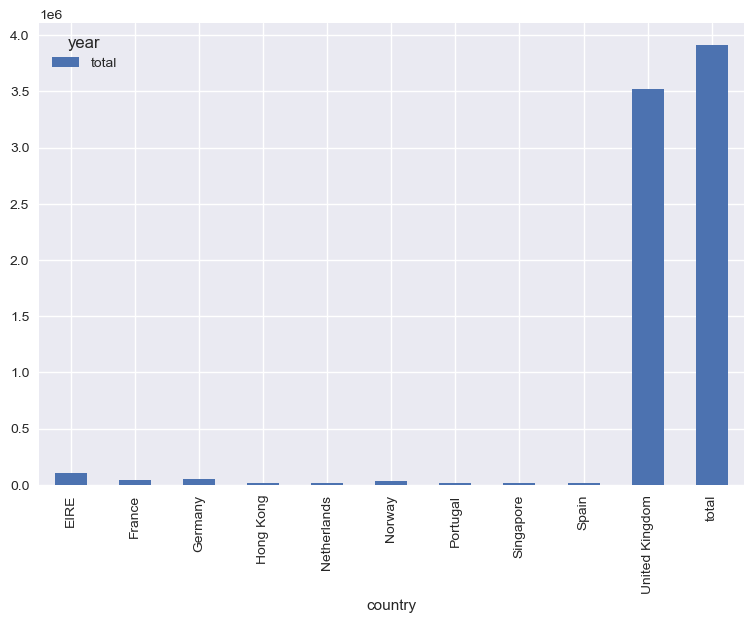

In [47]:
# Viz Top 10 Countries by Revenue
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
countries = pd.pivot_table(top10.head(11), index='country', values='total')
countries.plot(kind='bar',ax=ax1)

<AxesSubplot:xlabel='year-month', ylabel='country'>

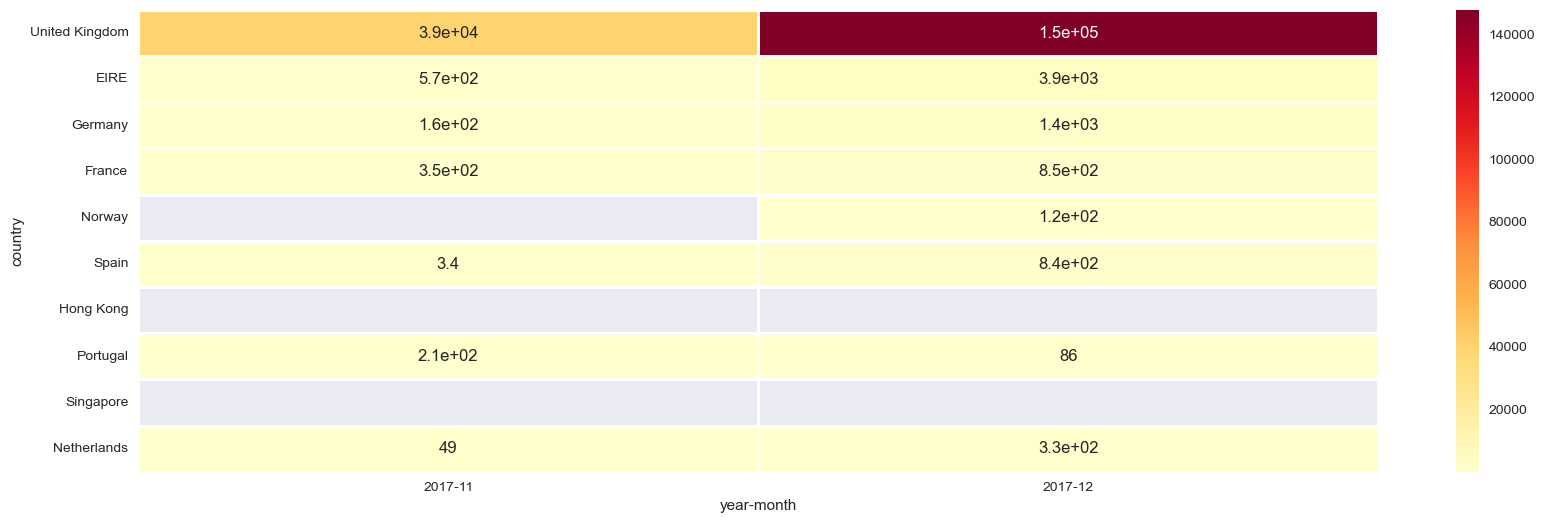

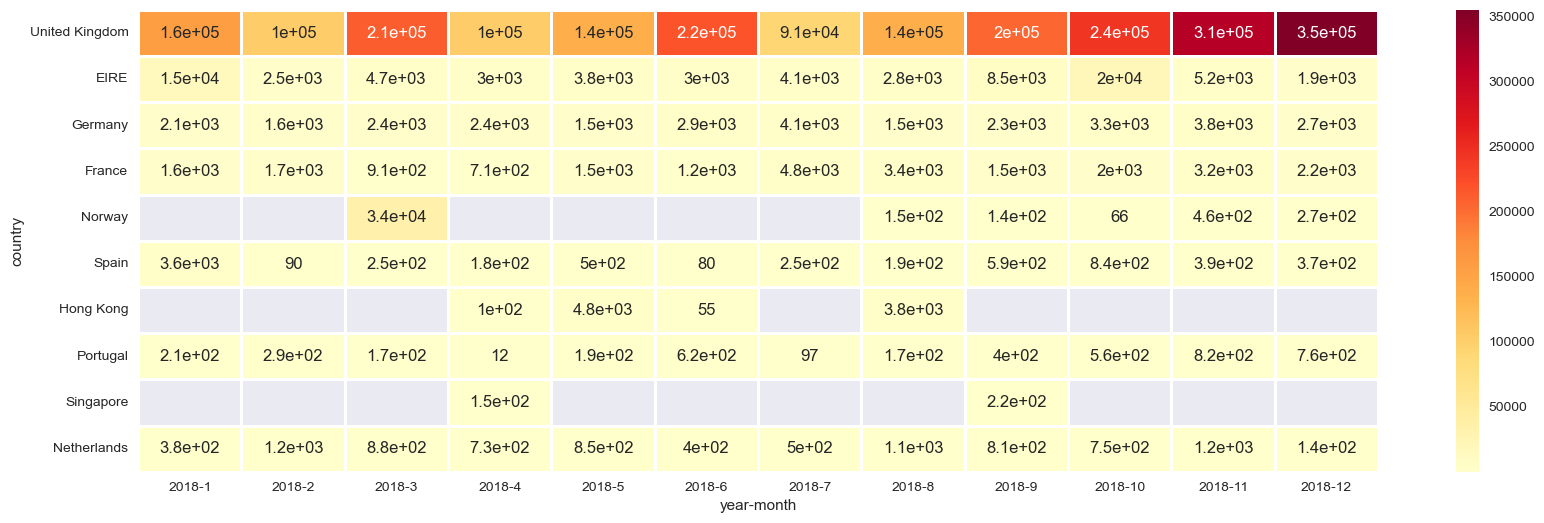

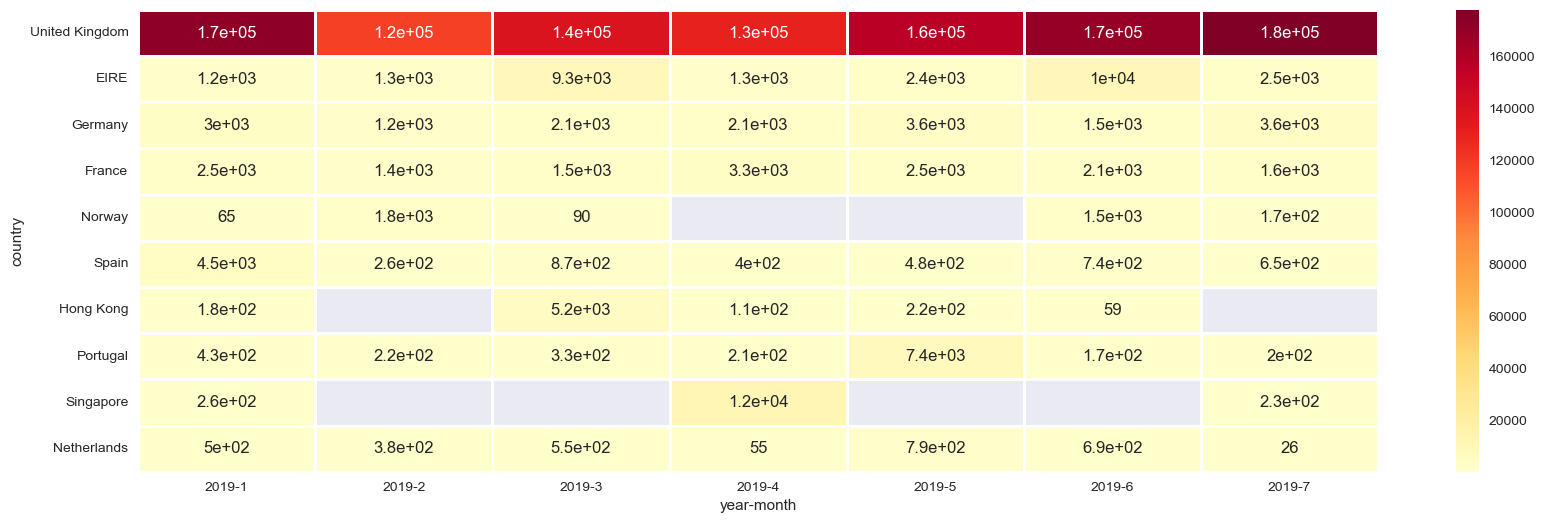

In [50]:
# Viz Month Wise Heat Map
import seaborn as sns
plt.figure(figsize=(20,6))
mw = rev.transpose()
mw = mw.drop('total')
sns.heatmap(mw.filter(regex='2017'), cmap="YlOrRd", annot=True, cbar=True, linewidths=1)
plt.figure(figsize=(20,6))
sns.heatmap(mw.filter(regex='2018'), cmap="YlOrRd", annot=True, cbar=True, linewidths=1)
plt.figure(figsize=(20,6))
sns.heatmap(mw.filter(regex='2019'), cmap="YlOrRd", annot=True, cbar=True, linewidths=1)

In [51]:
# Span Days
df_invoice_dates = df['invoice_date'].unique()
span_days = df_invoice_dates.max() - df_invoice_dates.min()
span_days = span_days.astype('timedelta64[D]')
n_days = span_days/np.timedelta64(1, 'D')
print('Number of days: ',n_days)

Number of days:  610.0


In [54]:
df_ts=convert_to_ts(df)
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             607 non-null    datetime64[ns]
 1   purchases        607 non-null    int32         
 2   unique_invoices  607 non-null    int64         
 3   unique_streams   607 non-null    int64         
 4   total_views      607 non-null    int64         
 5   year_month       607 non-null    object        
 6   revenue          607 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(1)
memory usage: 30.9+ KB


<AxesSubplot:xlabel='date'>

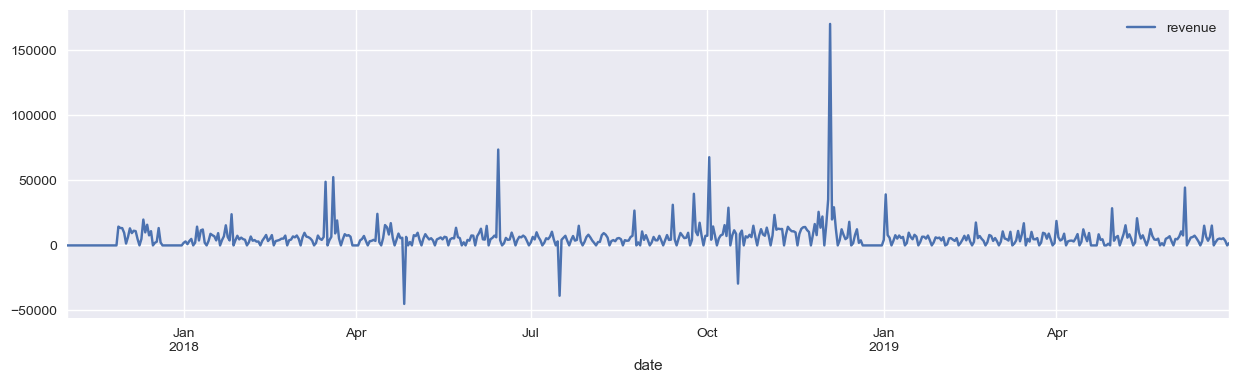

In [55]:
df_ts.head()
df_ts.plot(x="date", y="revenue", figsize=(15,4))

## Part - 2 Model Building & Selection

### 1. State the different modeling approaches that you will compare to address the business opportunity.
a. Random Forest

In [56]:
!pip install joblib

In [58]:
# Initial variables
run_start = time.time() 
data_dir = os.path.join(".","cs-train")
print("...fetching data")

# Fetching data 
df = fetch_data(data_dir)

# Time taken
m, s = divmod(time.time()-run_start,60)
h, m = divmod(m, 60)
print("load time:", "%d:%02d:%02d"%(h, m, s))

# Output
df.head()

# From dataframe to Timeseries
ts = convert_to_ts(df)
ts.head()

# Training Samples
X, y, dates = engineer_features(ts)

X.head()

...fetching data
load time: 0:00:09


,previous_7,previous_14,previous_28,previous_70,previous_year,recent_invoices,recent_views
0,14450.54,14450.54,14450.54,14450.54,0.0,5.928571,537.392857
1,27862.50,27862.50,27862.50,27862.50,0.0,10.310345,1007.103448
2,41152.75,41152.75,41152.75,41152.75,0.0,14.966667,1499.066667
3,50840.03,50840.03,50840.03,50840.03,0.0,18.533333,1916.533333
4,52283.29,52283.29,52283.29,52283.29,0.0,19.600000,2026.966667


Pipeline for Timeseries

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, median_absolute_error

In [78]:
# Train / Test sp
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Random Forest
pipe = Pipeline([("scaler", StandardScaler()),
                 ("rf", RandomForestRegressor(n_estimators=20))])

## Training Phase
pipe.fit(X_train, y_train)

## Testing Phase
y_pred = pipe.predict(X_test)
print(r'R2=%.2f, MAE=%.2f'%(r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))

R2=0.94, MAE=7206.22
